In [9]:
using DataFrames
using PyCall
using PyPlot

@pyimport seaborn as sns

sns.set_context("notebook")
sns.set_style("ticks")
sns.set_palette("colorblind")

In [8]:
data = readtable("Aldebaran_2017-02-27T1006.txt", names=[:Filename, :JD_MID, :BJD_MID, :RV_raw, :RV_bvc, :Sigma1, :Sigma2, :Flux], eltypes=[String, Float64, Float64, Float64, Float64, Float64, Float64, Float64], separator=' ', allowcomments=true)

,Filename,JD_MID,BJD_MID,RV_raw,RV_bvc,Sigma1,Sigma2,Flux
1,s1_2016-09-27T02-30-31_ext.iod,2.4576586047639e6,2.4576586079587075e6,27475.6,54499.23,63.62,1.85,51669.5
2,s1_2016-09-27T02-31-14_ext.iod,2.4576586052656e6,2.457658608460453e6,27475.0,54497.6,57.82,1.59,52779.2
3,s1_2016-09-28T00-31-39_ext.iod,2.4576595222216e6,2.457659525497905e6,27571.38,54508.9,62.33,1.8,43955.0
4,s1_2016-09-28T00-32-23_ext.iod,2.4576595227256e6,2.45765952600195e6,27574.66,54511.65,61.49,1.9,49487.7
5,s1_2016-09-28T00-33-06_ext.iod,2.457659523228e6,2.457659526504395e6,27571.82,54508.28,64.0,1.96,50101.7
6,s1_2016-09-28T04-00-12_ext.iod,2.4576596670447e6,2.457659670333956e6,27849.77,54508.25,58.54,1.5,52100.8
7,s1_2016-09-28T04-00-56_ext.iod,2.4576596675485e6,2.4576596708378005e6,27852.16,54509.35,56.27,1.48,61799.2
8,s1_2016-09-28T04-01-39_ext.iod,2.4576596680522e6,2.457659671341546e6,27853.62,54509.51,54.88,1.42,60544.7
9,s1_2016-09-29T00-34-59_ext.iod,2.4576605245318e6,2.4576605278965426e6,27787.21,54498.88,58.61,1.64,42912.8
10,s1_2016-09-29T00-35-43_ext.iod,2.4576605250355e6,2.457660528400288e6,27785.04,54496.14,61.51,1.73,46771.9


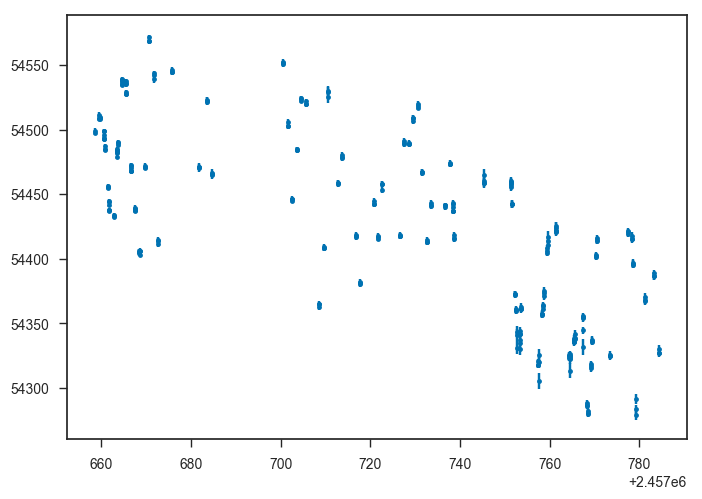

(PyObject <matplotlib.lines.Line2D object at 0x31e16b550>,(),(PyObject <matplotlib.collections.LineCollection object at 0x32d23bb70>,))

In [11]:
errorbar(data[:BJD_MID], data[:RV_bvc], data[:Sigma2], fmt=".")

In [12]:
writedlm("tablesong.dat", hcat(data[:BJD_MID], data[:RV_bvc], data[:Sigma2]))